### Import philipspackages

In [1]:
import Philipsamppython

In [2]:
import os

In [3]:
# create server object
ex = Philipsamppython.AMP()

# intialize sparkContext, sqlContext
# ex.InitializeAMPConfig(conffile="../../../Release/MlServer/bin/bdamlconf.json")
ex.InitializeAMPConfig(conffile=os.path.join(os.environ.get('CONFIG_FILE_PATH'),"bdamlconf.json"))

filepath(inside _resolve_path):  /var/lib/dsp/dspvolume/bdamlconf.json

Initializing Philipsamppython package:
IpAddress:  ml-service
port:8886
filepath(inside _resolve_path):  /data/spark/spark-1.6.1-bin-hadoop2.6
spark_home(after resolve path):  /data/spark/spark-1.6.1-bin-hadoop2.6
filepath(inside _resolve_path):  /var/lib/dsp/dspvolume/plugins
plugins_path(after resolve path):  /var/lib/dsp/dspvolume/plugins
filepath(inside _resolve_path):  /var/lib/dsp/dspvolume/models
filepath(inside _resolve_path):  /var/lib/dsp/dspvolume/data
filepath(inside _resolve_path):  /var/lib/dsp/dspvolume/plugins
plugins_path_log(after resolve path):  /var/lib/dsp/dspvolume/plugins
Successfully imported all Spark Modules


### Read and display the train/validation data

In [4]:
# train data
data_path_str_train = "BreastCancer"
pyspark_train_df = ex.AMPReadCSV(data_path=data_path_str_train, header="true")

print "rows in train: ", pyspark_train_df.count()
df_columns = pyspark_train_df.columns
print "columns: ", df_columns
pyspark_train_df.head(5)

Successfully imported all Spark Modules
Spark initialization successful
self.sqlContext:  <pyspark.sql.context.SQLContext object at 0x7f5f8a305650>
rows in train:  699
columns:  ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


[Row(Clump Thickness=5, Uniformity of Cell Size=1, Uniformity of Cell Shape=1, Marginal Adhesion=1, Single Epithelial Cell Size=2, Bare Nuclei=u'1', Bland Chromatin=3, Normal Nucleoli=1, Mitoses=1, Class=u'Benign'),
 Row(Clump Thickness=5, Uniformity of Cell Size=4, Uniformity of Cell Shape=4, Marginal Adhesion=5, Single Epithelial Cell Size=7, Bare Nuclei=u'10', Bland Chromatin=3, Normal Nucleoli=2, Mitoses=1, Class=u'Benign'),
 Row(Clump Thickness=3, Uniformity of Cell Size=1, Uniformity of Cell Shape=1, Marginal Adhesion=1, Single Epithelial Cell Size=2, Bare Nuclei=u'2', Bland Chromatin=3, Normal Nucleoli=1, Mitoses=1, Class=u'Benign'),
 Row(Clump Thickness=6, Uniformity of Cell Size=8, Uniformity of Cell Shape=8, Marginal Adhesion=1, Single Epithelial Cell Size=3, Bare Nuclei=u'4', Bland Chromatin=3, Normal Nucleoli=7, Mitoses=1, Class=u'Benign'),
 Row(Clump Thickness=4, Uniformity of Cell Size=1, Uniformity of Cell Shape=1, Marginal Adhesion=3, Single Epithelial Cell Size=2, Bare

In [5]:
# validation data
data_path_str_validation = "BreastCancerTest"
pyspark_validation_df = ex.AMPReadCSV(data_path=data_path_str_validation, header="true")

print "rows in validation: ", pyspark_validation_df.count()
pyspark_validation_df.head(1)
# pyspark_validation_df.select('*').show()

self.sqlContext:  <pyspark.sql.context.SQLContext object at 0x7f5f8a305650>
rows in validation:  31


[Row(Clump Thickness=5, Uniformity of Cell Size=1, Uniformity of Cell Shape=1, Marginal Adhesion=1, Single Epithelial Cell Size=2, Bare Nuclei=u'1', Bland Chromatin=3, Normal Nucleoli=1, Mitoses=1, Class=u'Benign')]

### Display the classes

In [6]:
# display the Classes
# pyspark_train_df.select('Class').distinct().rdd.map(lambda r:r[0]).collect()  # This query is slow
predict_class_array = sorted([i[0] for i in pyspark_train_df.select('Class').distinct().collect()])
print 'classes: ', predict_class_array

# create a map from string to index
i = 0
dict_predict_class_to_index = {}
for predict_class in predict_class_array:
    dict_predict_class_to_index[predict_class] = i
    i += 1

dict_predict_class_to_index

classes:  [u'Benign', u'Malignant']


{u'Benign': 0, u'Malignant': 1}

### Scatter plot of variables

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
var1 = df_columns[0]
var2 = df_columns[1]

x1 = [elem[0] for elem in pyspark_train_df.select(var1).collect()]
x2 = [elem[0] for elem in pyspark_train_df.select(var2).collect()]
y = [dict_predict_class_to_index[elem[0]] for elem in pyspark_train_df.select('Class').collect()]

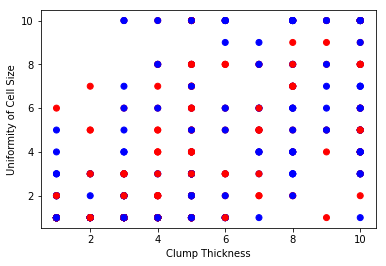

In [11]:
plt.figure(1)
plt.scatter(x1, x2, c=['b', 'r'], marker='o')
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

### Logistic Regression model creation

In [12]:
print 'data path: ', ex.data_path

data path:  /var/lib/dsp/dspvolume/data


In [13]:
data_path_str_train_scikit = ex.data_path + "/" + data_path_str_train + "_scikit.csv"
data_path_str_validation_scikit = ex.data_path + "/" + data_path_str_validation + "_scikit.csv"

In [14]:
import pandas as pd

In [15]:
pyspark_train_df.toPandas().to_csv(path_or_buf=data_path_str_train_scikit, index=False)

In [16]:
pyspark_validation_df.toPandas().to_csv(path_or_buf=data_path_str_validation_scikit, index=False)

In [17]:
train_df_scikit = pd.read_csv(data_path_str_train_scikit)

In [18]:
train_df_scikit.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,Benign
1,5,4,4,5,7,10,3,2,1,Benign
2,3,1,1,1,2,2,3,1,1,Benign
3,6,8,8,1,3,4,3,7,1,Benign
4,4,1,1,3,2,1,3,1,1,Benign
5,8,10,10,8,7,10,9,7,1,Malignant
6,1,1,1,1,2,10,3,1,1,Benign
7,2,1,2,1,2,1,3,1,1,Benign
8,2,1,1,1,2,1,1,1,5,Benign
9,4,2,1,1,2,1,2,1,1,Benign


In [19]:
validation_df_scikit = pd.read_csv(data_path_str_validation_scikit)

In [20]:
validation_df_scikit.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,Benign
1,5,4,4,5,7,10,3,2,1,Benign
2,3,1,1,1,2,2,3,1,1,Benign
3,6,8,8,1,3,4,3,7,1,Benign
4,4,1,1,3,2,1,3,1,1,Benign
5,8,10,10,8,7,10,9,7,1,Malignant
6,1,1,1,1,2,10,3,1,1,Benign
7,2,1,2,1,2,1,3,1,1,Benign
8,2,1,1,1,2,1,1,1,5,Benign
9,4,2,1,1,2,1,2,1,1,Benign


In [21]:
train_df_scikit.columns

Index([u'Clump Thickness', u'Uniformity of Cell Size',
       u'Uniformity of Cell Shape', u'Marginal Adhesion',
       u'Single Epithelial Cell Size', u'Bare Nuclei', u'Bland Chromatin',
       u'Normal Nucleoli', u'Mitoses', u'Class'],
      dtype='object')

In [22]:
feature_columns = []
for col in train_df_scikit.columns:
    if col != 'Class' and col != 'Bare Nuclei':
        feature_columns.append(col)
        
print feature_columns

['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']


In [23]:
# feature_data = df.as_matrix(columns=feature_columns)
# class_data = df.as_matrix(columns=['Class'])
feature_data_train = train_df_scikit.as_matrix(columns=feature_columns)
class_data_train = train_df_scikit.as_matrix(columns=['Class'])

In [24]:
feature_data_validation = validation_df_scikit.as_matrix(columns=feature_columns)
class_data_validation = validation_df_scikit.as_matrix(columns=['Class'])

In [25]:
import numpy as np

In [26]:
np.size(feature_data_train[0])

8

In [27]:
feature_data_train[0]

array([5, 1, 1, 1, 2, 3, 1, 1])

In [28]:
class_data_train

array([['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Malignant'],
       ['Malignant'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Malign

In [29]:
class_data_validation

array([['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Malignant'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign'],
       ['Benign']], dtype=object)

In [30]:
feature_data_validation[0]

array([5, 1, 1, 1, 2, 3, 1, 1])

In [31]:
class_data_numeric_train = np.array([])

for elem in class_data_train:
    if elem == u'Benign':
        class_data_numeric_train = np.append(class_data_numeric_train, 0)
    else:
        class_data_numeric_train = np.append(class_data_numeric_train, 1)

In [32]:
class_data_numeric_validation = np.array([])

for elem in class_data_validation:
    if elem == u'Benign':
        class_data_numeric_validation = np.append(class_data_numeric_validation, 0)
    else:
        class_data_numeric_validation = np.append(class_data_numeric_validation, 1)

In [33]:
class_data_numeric_train

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0

In [34]:
class_data_numeric_validation

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.])

In [35]:
# scikit learn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(feature_data_train, class_data_numeric_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
expected = class_data_numeric_validation
predicted = model.predict(feature_data_validation)

In [39]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91        22
        1.0       0.78      0.78      0.78         9

avg / total       0.87      0.87      0.87        31



In [40]:
print(metrics.confusion_matrix(expected, predicted))

[[20  2]
 [ 2  7]]


In [41]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [42]:
%%writefile examplescore.py
import Philipsamppython
import os
import pandas as pd
import pickle
# create server object
ex = Philipsamppython.AMP()

# intialize sparkContext, sqlContext
# ex.InitializeAMPConfig(conffile="../../../Release/MlServer/bin/bdamlconf.json")
ex.InitializeAMPConfig(conffile=os.path.join(os.environ.get('CONFIG_FILE_PATH'),"bdamlconf.json"))

data_path_str_validation_scikit = "/var/lib/dsp/dspvolume/data/BreastCancerTest_scikit.csv"

validation_df_scikit = pd.read_csv(data_path_str_validation_scikit)
feature_columns = []
for col in validation_df_scikit.columns:
    if col != 'Class' and col != 'Bare Nuclei':
        feature_columns.append(col)
        
print feature_columns
feature_data_validation = validation_df_scikit.as_matrix(columns=feature_columns)

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(feature_data_validation)
df = pd.DataFrame(result)
print(df)
ex.AMPSetResult(dataframe=df)

Overwriting examplescore.py


### Stop the spark context

In [43]:
if ex.sparkContext is not None:
    ex.sparkContext.stop()